In [18]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path("train")
fls = get_image_files(path)

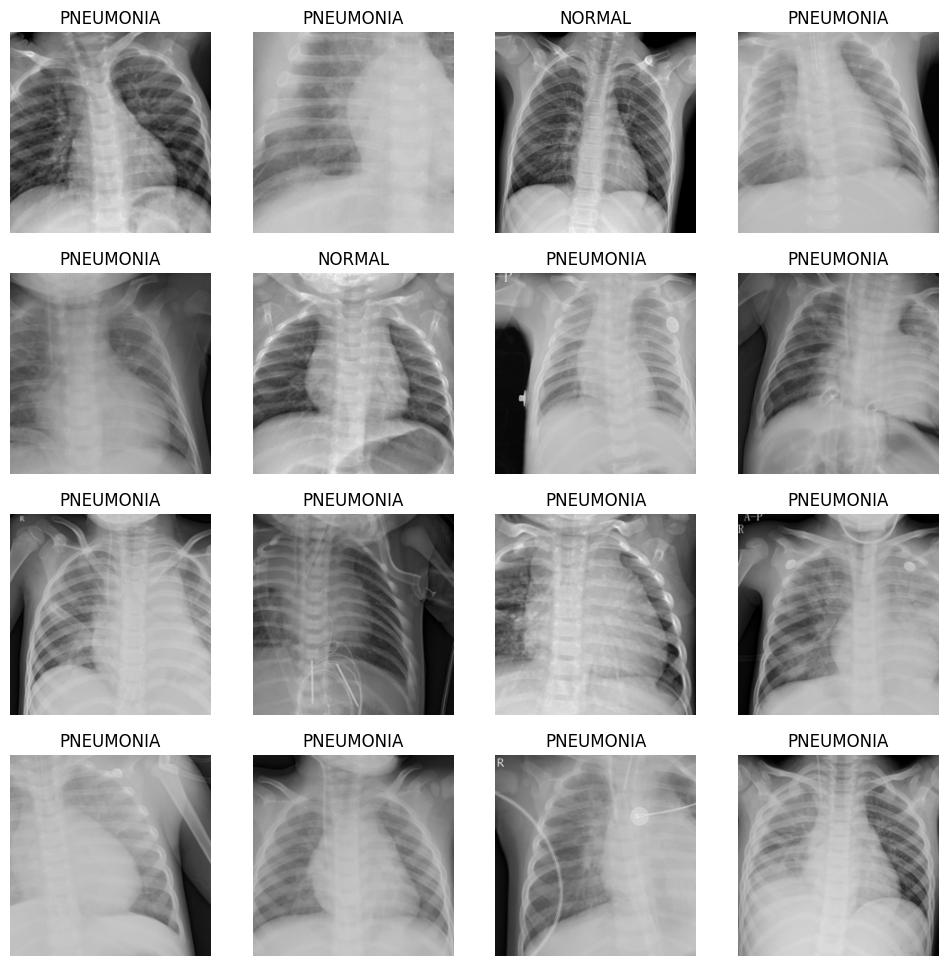

In [19]:
# Create datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Create Dataloaders
dls = transports.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4)

In [20]:
# Training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.477342,0.220399,0.925216,01:54


epoch,train_loss,valid_loss,accuracy,time
0,0.135948,0.250425,0.951103,01:50
1,0.073285,0.171329,0.958773,01:51
2,0.044389,0.073050,0.978907,01:49
3,0.025120,0.091928,0.976031,01:50


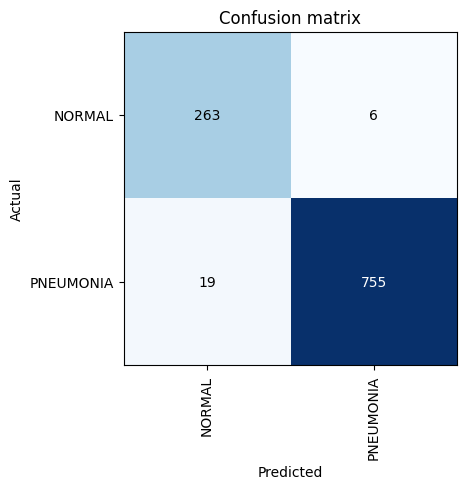

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

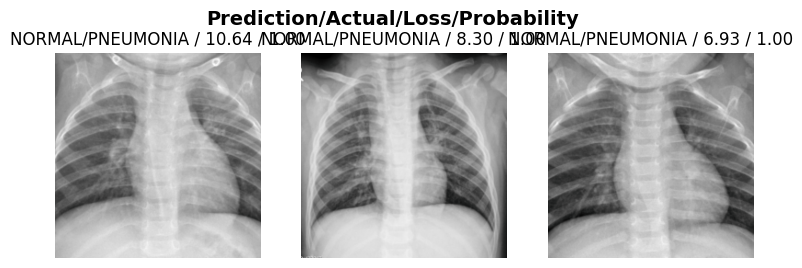

In [22]:
interp.plot_top_losses(3, nrows=1)

In [23]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: PNEUMONIA
Probabilty: 100.0%


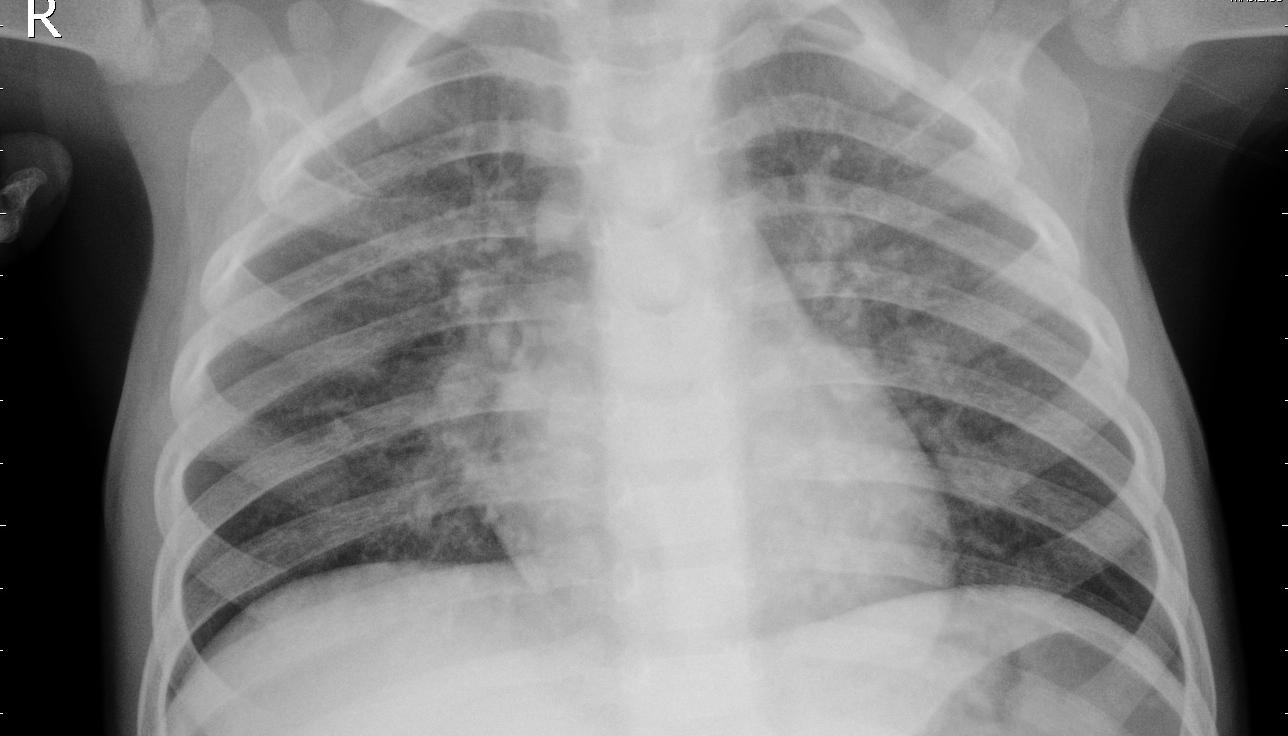

In [25]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Prediction: {pred}")
print(f"Probabilty: {probs[pred_id]*100:.1f}%")
img

In [26]:
solution = pd.read_csv('sample_solution.csv')
solution.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [32]:
dic = {'NORMAL': 0, 'PNEUMONIA': 1}
for i in range(0,624):
    label = solution.iloc[i,0]
    img = PILImage.create(Path(f'test/{label}'))
    pred, _, prob = learn.predict(img)
    solution.iloc[i,1] = dic[pred]

In [33]:
solution.to_csv('pneumonia_solution.csv', index=False)

In [34]:
import pandas as pd
submission = pd.read_csv("pneumonia_solution.csv")
submission.head()


,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
